In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA EXPLORATION**

**DATASET**

In [3]:
import pandas as pd
import numpy as np

Train = pd.read_csv("/content/drive/MyDrive/new_train_sample.csv")
Test = pd.read_csv("/content/drive/MyDrive/GUIDE_Test.csv", low_memory=False)

In [4]:
Train

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
Test

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [6]:
print("Train")
print(Train.shape)
print("Test")
print(Test.shape)

Train
(4758418, 46)
Test
(4147992, 46)


In [7]:
print("Train")
print(Train.info())
print("Test")
print(Test.info())

Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId  

In [8]:
print("Train")
print(Train.describe())
print("Test")
print(Test.describe())

Train
         Unnamed: 0            Id         OrgId    IncidentId       AlertId  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   4.757914e+06  8.425237e+11  1.815396e+02  7.066577e+04  4.062607e+05   
std    2.747579e+06  4.962194e+11  3.868571e+02  1.208436e+05  4.590474e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.378584e+06  4.123169e+11  1.000000e+01  5.030000e+02  2.323700e+04   
50%    4.757002e+06  8.418136e+11  4.500000e+01  1.032300e+04  2.165090e+05   
75%    7.137112e+06  1.271310e+12  1.710000e+02  8.436900e+04  6.709575e+05   
max    9.516834e+06  1.709397e+12  6.147000e+03  5.997030e+05  1.721456e+06   

         DetectorId    AlertTitle      DeviceId        Sha256     IpAddress  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   1.105717e+02  2.945133e+03  9.566974e+04  1.287152e+05  2.857508e+05   
std    4.345897e+02  1.145625e+04  1.633971e+

In [9]:
print("Train")
print(Train['Category'].unique())
print("Test")
print(Test['Category'].unique())

Train
['Malware' 'Impact' 'Execution' 'SuspiciousActivity' 'Exfiltration'
 'InitialAccess' 'DefenseEvasion' 'CommandAndControl' 'Discovery'
 'Persistence' 'CredentialAccess' 'LateralMovement' 'Ransomware'
 'UnwantedSoftware' 'PrivilegeEscalation' 'Exploit' 'Collection'
 'CredentialStealing' 'WebExploit' 'Weaponization']
Test
['LateralMovement' 'CommandAndControl' 'InitialAccess' 'Discovery'
 'SuspiciousActivity' 'Impact' 'CredentialAccess' 'Exfiltration'
 'UnwantedSoftware' 'DefenseEvasion' 'Malware' 'Execution' 'Persistence'
 'CredentialStealing' 'Collection' 'Ransomware' 'Exploit'
 'PrivilegeEscalation' 'WebExploit']


In [10]:
print("Train")
print(Train.isnull().sum())
print("Test")
print(Test.isnull().sum())

Train
Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
File

In [11]:
print("Train")
print(Train.duplicated().sum())
print("Test")
print(Test.duplicated().sum())

Train
0
Test
104


In [12]:
print("Train")
print(Train.drop_duplicates(inplace=True))
print("Test")
print(Test.drop_duplicates(inplace=True))

Train
None
Test
None


In [13]:
print("Train")
print(Train.duplicated().sum())
print("Test")
print(Test.duplicated().sum())

Train
0
Test
0


In [14]:
print("Train")
print(Train.shape)
print("Test")
print(Test.shape)

Train
(4758418, 46)
Test
(4147888, 46)


In [15]:
print("Train")
print(Train.isnull().sum())
print("Test")
print(Test.isnull().sum())

Train
Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
File

# **Data Cleaning on train dataset**



**Handling missing values**

In [16]:
missing_percentage = Train.isnull().mean() * 100

In [17]:
missing_percentage

,0
Unnamed: 0,0.000000
Id,0.000000
OrgId,0.000000
IncidentId,0.000000
AlertId,0.000000
Timestamp,0.000000
DetectorId,0.000000
AlertTitle,0.000000
Category,0.000000
MitreTechniques,57.437913


In [18]:
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [19]:
data_cleaned = Train.drop(columns=columns_to_drop)
data_cleaned

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,...,3421,881,4132,4227,3586,5,66,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,TruePositive,...,3421,881,97007,9177,3586,5,66,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,BenignPositive,...,3421,881,39978,114449,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [20]:
data_cleaned.shape

(4758418, 36)

In [21]:
data_cleaned.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,25775


In [22]:
data_cleaned.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive', nan],
      dtype=object)

In [23]:
data_cleaned.dropna(subset=['IncidentGrade'], inplace=True)

In [24]:
data_cleaned.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [25]:
print(data_cleaned.shape)
data_cleaned

(4732643, 36)


,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,...,3421,881,4132,4227,3586,5,66,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,TruePositive,...,3421,881,97007,9177,3586,5,66,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,BenignPositive,...,3421,881,39978,114449,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [26]:
data_cleaned.nunique()

,0
Unnamed: 0,4732643
Id,642342
OrgId,5236
IncidentId,421530
AlertId,1150459
Timestamp,719084
DetectorId,7369
AlertTitle,74710
Category,20
IncidentGrade,3


In [27]:
print(data_cleaned.shape)
print(data_cleaned.Id.nunique())

(4732643, 36)
642342


In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732643 entries, 0 to 4758417
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Id                  int64 
 2   OrgId               int64 
 3   IncidentId          int64 
 4   AlertId             int64 
 5   Timestamp           object
 6   DetectorId          int64 
 7   AlertTitle          int64 
 8   Category            object
 9   IncidentGrade       object
 10  EntityType          object
 11  EvidenceRole        object
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId       int

# **Feature Engineering**

In [29]:
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])


In [30]:
data_cleaned['Timestamp'].head()

,Timestamp
0,2024-06-06 05:56:47+00:00
1,2024-06-03 10:45:09+00:00
2,2024-06-13 03:36:40+00:00
3,2024-06-08 16:54:57+00:00
4,2024-06-09 02:48:01+00:00


In [31]:
# Extract day, month, and hour from the Timestamp
data_cleaned['Day'] = data_cleaned['Timestamp'].dt.day
data_cleaned['Month'] = data_cleaned['Timestamp'].dt.month
data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour
data_cleaned['Year'] = data_cleaned['Timestamp'].dt.year


# Drop the original Timestamp column
data_cleaned.drop('Timestamp', axis=1, inplace=True)

print(data_cleaned.head())

   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType  ...  \
0         813             Malware  BenignPositive       File  ...   
1          25              Impact  BenignPositive    Machine  ...   
2         444           Execution  BenignPositive    Machine  ...   
3        1233  SuspiciousActivity    TruePositive       File  ...   
4       58829        Exfiltration  BenignPositive       File  ...   

  ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  Day  Month  \
0           3586         5         66          242   1445  10630    6   

# **EDA**

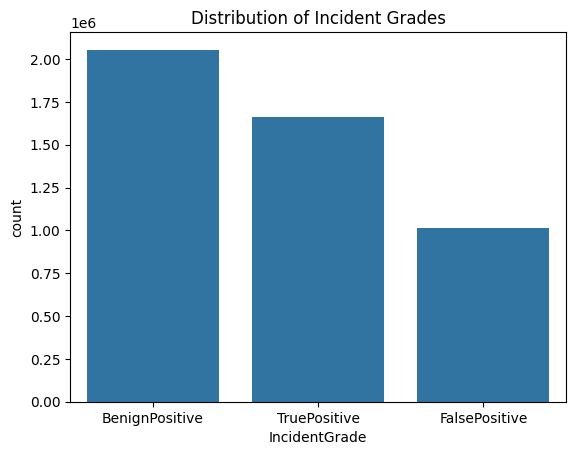

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=Train)
plt.title('Distribution of Incident Grades')
plt.show()

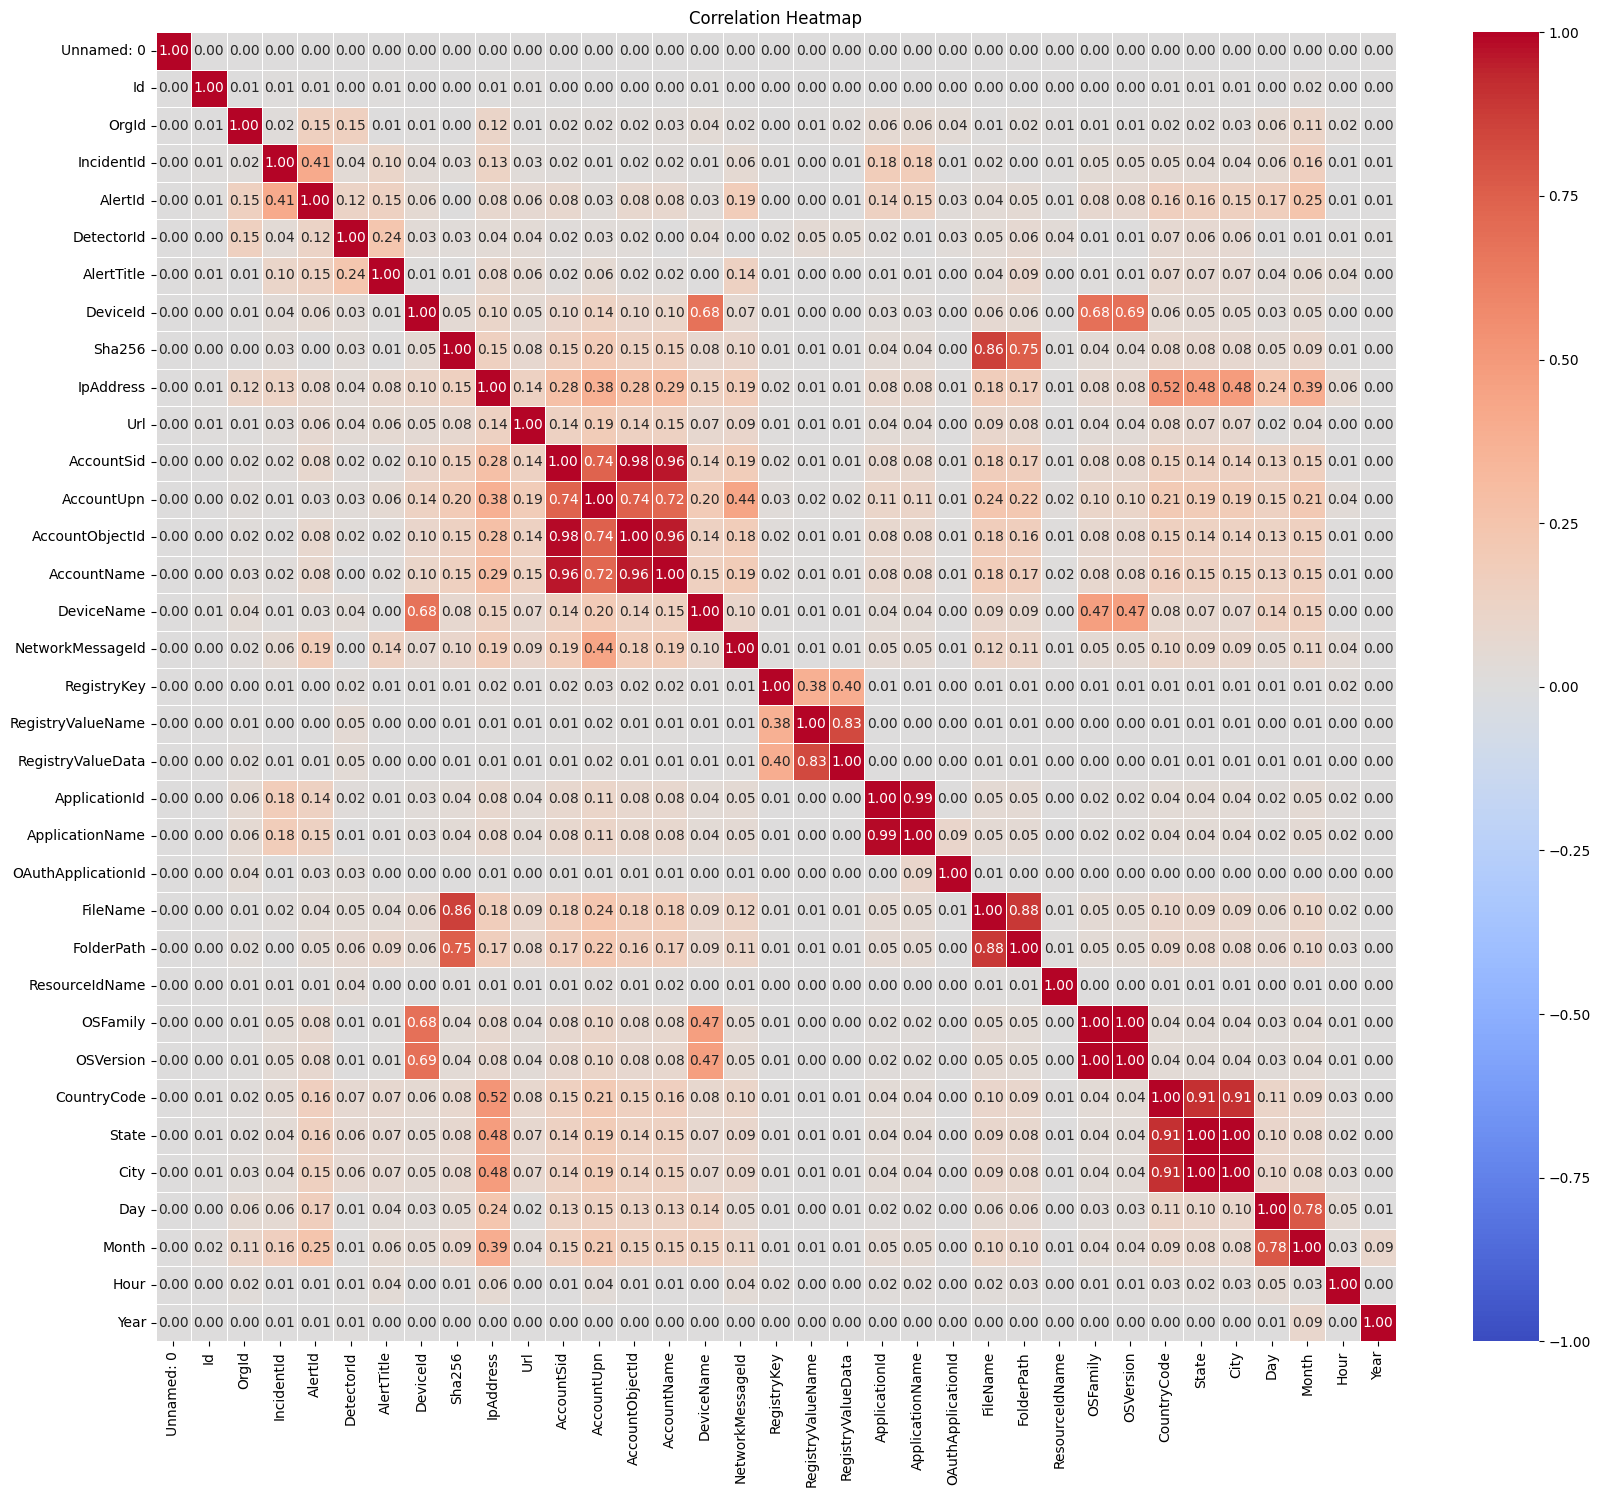

In [33]:
# Select numerical columns
numerical_df = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Encoding Categorical Variables**

In [34]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y])
                    for x, y in zip(*high_corr_var)
                    if x != y and x < y]

# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    columns_to_remove.add(col2)  # or col1, based on your strategy

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = data_cleaned.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
print(df_cleaned_corr.head())

Columns removed: ['State', 'FileName', 'RegistryValueData', 'City', 'OSVersion', 'AccountObjectId', 'AccountName', 'FolderPath', 'ApplicationName']
   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType  ...  \
0         813             Malware  BenignPositive       File  ...   
1          25              Impact  BenignPositive    Machine  ...   
2         444           Execution  BenignPositive    Machine  ...   
3        1233  SuspiciousActivity    TruePositive       File  ...   
4       58829        Exfiltration  BenignPositive       File  ...   

  Re

In [35]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr

categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}
# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr)


         Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0           5172780  1709396985476     26       18583   687462          31   
1           8470561   927712939180     33        5065     3990          38   
2           5897583  1090921697002    201      150787   807590         419   
3           3288552  1434519079555    204      108287    28575          44   
4           4060961  1005022347708     54      528202  1458226         102   
...             ...            ...    ...         ...      ...         ...   
4758413     3272416   103079215470    142       93987    15739         112   
4758414     6701254  1683627184337     36        1001   257479           2   
4758415     5665090  1597727836318    851       31194  1518250           1   
4758416     1421470   137438957239     12        2419     1203          16   
4758417     4621203  1228360650489    201       39946   590317           5   

         AlertTitle  Category  IncidentGrade  EntityType  ...  

# **Saving Label Encoder**

In [36]:
import joblib

# Save label encoders for categorical features

for column, le in label_encoders.items():
    joblib.dump(le, f'/content/drive/MyDrive/{column}_label_encoder.pkl')

# **Saving Cleaned Data**

In [37]:
#just saving for easy use: processed removing duplicates, null values and converted datetime
# also removed one of the co-related features to avoid multi colinearlity
# also label encoded and saved them in pkl and now saving to csv)
df_cleaned_corr.to_csv('/content/drive/MyDrive/train_data_processed.csv', index=False)

In [38]:
df_cleaned_corr

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,5172780,1709396985476,26,18583,687462,31,813,12,0,9,...,635,2251,881,3586,5,242,6,6,5,2024
1,8470561,927712939180,33,5065,3990,38,25,9,0,17,...,635,2251,881,3586,5,242,3,6,10,2024
2,5897583,1090921697002,201,150787,807590,419,444,6,0,17,...,635,2251,881,3586,5,242,13,6,3,2024
3,3288552,1434519079555,204,108287,28575,44,1233,16,2,9,...,635,2251,881,3586,5,242,8,6,16,2024
4,4060961,1005022347708,54,528202,1458226,102,58829,7,0,9,...,635,2251,881,3586,5,242,9,6,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,112,7836,7,1,19,...,635,2251,881,3586,5,242,10,6,10,2024
4758414,6701254,1683627184337,36,1001,257479,2,2,1,1,30,...,635,2251,881,3586,5,242,11,6,19,2024
4758415,5665090,1597727836318,851,31194,1518250,1,1,10,0,19,...,635,2251,881,3586,5,242,9,6,4,2024
4758416,1421470,137438957239,12,2419,1203,16,1334,9,0,13,...,635,2251,881,3586,5,242,21,5,23,2024


# **Exploratory Data Analysis (EDA) on TEST data**

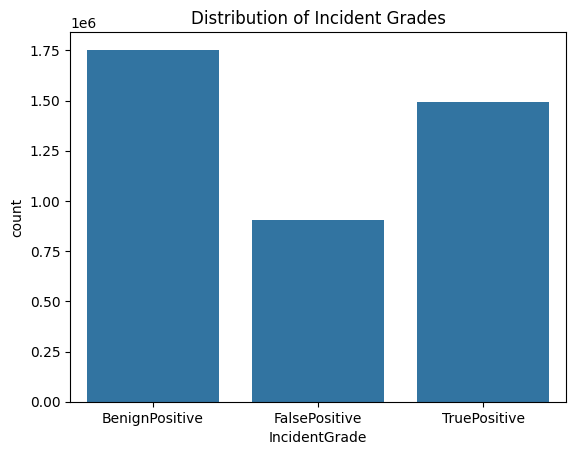

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=Test)
plt.title('Distribution of Incident Grades')
plt.show()

# **Feature Engineering**

In [40]:
Test['Timestamp'] = pd.to_datetime(Test['Timestamp'])
# Extract day, month, and hour from the Timestamp
Test['Day'] = Test['Timestamp'].dt.day
Test['Month'] = Test['Timestamp'].dt.month
Test['Hour'] = Test['Timestamp'].dt.hour

# Drop the original Timestamp column
Test.drop('Timestamp', axis=1, inplace=True)

# Check the new DataFrame
print(Test.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped  ... AntispamDirection SuspicionLevel LastVerdict  \
0           NaN  ...               NaN     Suspicious  Susp

In [41]:
Test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)

In [42]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 39 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   MitreTechniques     object 
 8   IncidentGrade       object 
 9   ActionGrouped       object 
 10  ActionGranular      object 
 11  EntityType          object 
 12  EvidenceRole        object 
 13  DeviceId            int64  
 14  Sha256              int64  
 15  IpAddress           int64  
 16  Url                 int64  
 17  AccountSid          int64  
 18  AccountUpn          int64  
 19  DeviceName          int64  
 20  NetworkMessageId    int64  
 21  EmailClusterId      float64
 22  RegistryKey         int64  
 23  RegistryValueName   int64  
 24  ApplicationId       int64  
 

In [43]:
Test = Test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
Test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,1631,635,2251,881,3586,5,242,6,6,17


In [44]:
# Load label encoder

loaded_label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']  # list your categorical columns
for column in categorical_cols:
    loaded_label_encoders[column] = joblib.load(f'/content/drive/MyDrive/{column}_label_encoder.pkl')

In [45]:
# Apply label encoding to categorical features
for column, le in loaded_label_encoders.items():
    if column in Test.columns:
        Test[column] = le.transform(Test[column])

Test

<ipython-input-45-a50d69d27452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[column] = le.transform(Test[column])
<ipython-input-45-a50d69d27452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[column] = le.transform(Test[column])
<ipython-input-45-a50d69d27452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,17,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,25,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,30,0,...,1631,635,2251,881,3586,5,242,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,139,120,10,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,3
4147988,438086666953,1323,31001,304819,219,196,10,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,19
4147989,1297080124487,47,3653,7243,57,29,1,1,13,1,...,1631,635,2251,881,3586,5,242,15,6,0
4147990,627065226886,70,4243,19142,1,1,10,0,20,0,...,1631,635,2251,881,3586,5,242,11,6,16


# **Saving cleaned Test Data**

In [46]:
Test.to_csv('/content/drive/MyDrive/test_data_processed.csv', index=False)

# **Import necessary packages**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Importing the cleaned Dataset**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/train_data_processed.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test_data_processed.csv")

In [5]:
df_train

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,5172780,1709396985476,26,18583,687462,31,813,12,0,9,...,635,2251,881,3586,5,242,6,6,5,2024
1,8470561,927712939180,33,5065,3990,38,25,9,0,17,...,635,2251,881,3586,5,242,3,6,10,2024
2,5897583,1090921697002,201,150787,807590,419,444,6,0,17,...,635,2251,881,3586,5,242,13,6,3,2024
3,3288552,1434519079555,204,108287,28575,44,1233,16,2,9,...,635,2251,881,3586,5,242,8,6,16,2024
4,4060961,1005022347708,54,528202,1458226,102,58829,7,0,9,...,635,2251,881,3586,5,242,9,6,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732638,3272416,103079215470,142,93987,15739,112,7836,7,1,19,...,635,2251,881,3586,5,242,10,6,10,2024
4732639,6701254,1683627184337,36,1001,257479,2,2,1,1,30,...,635,2251,881,3586,5,242,11,6,19,2024
4732640,5665090,1597727836318,851,31194,1518250,1,1,10,0,19,...,635,2251,881,3586,5,242,9,6,4,2024
4732641,1421470,137438957239,12,2419,1203,16,1334,9,0,13,...,635,2251,881,3586,5,242,21,5,23,2024


In [6]:
df_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,17,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,25,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,30,0,...,1631,635,2251,881,3586,5,242,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147883,541165881145,262,3017,227156,139,120,10,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,3
4147884,438086666953,1323,31001,304819,219,196,10,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,19
4147885,1297080124487,47,3653,7243,57,29,1,1,13,1,...,1631,635,2251,881,3586,5,242,15,6,0
4147886,627065226886,70,4243,19142,1,1,10,0,20,0,...,1631,635,2251,881,3586,5,242,11,6,16


# **Train-Validation Split**

In [9]:
#Splitting data
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Importance**

In [10]:
#Selecting top features using anova
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day'],
      dtype='object')


In [11]:
X_new=X[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
X_new

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,AccountSid,DeviceName,NetworkMessageId,CountryCode,Day
0,26,18583,687462,31,813,12,9,1,1296,360606,441377,153085,529644,242,6
1,33,5065,3990,38,25,9,17,0,138268,360606,441377,3142,529644,242,3
2,201,150787,807590,419,444,6,17,0,138268,360606,441377,4181,529644,242,13
3,204,108287,28575,44,1233,16,9,1,138268,360606,441377,153085,529644,242,8
4,54,528202,1458226,102,58829,7,9,0,138268,360606,441377,153085,529644,242,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732638,142,93987,15739,112,7836,7,19,0,138268,360606,441377,153085,869,242,10
4732639,36,1001,257479,2,2,1,30,0,138268,360606,32117,153085,529644,242,11
4732640,851,31194,1518250,1,1,10,19,1,138268,360606,441377,153085,402271,242,9
4732641,12,2419,1203,16,1334,9,13,1,138268,546,441377,153085,529644,242,21


# **Training Data with Selected features**

In [12]:
#Training train data with selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [13]:
# Output the shapes of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)

Training set shape: (3786114, 15)
Validation set shape: (946529, 15)


# **LOGISTIC REGRESSION**


Evaluating Logistic Regression Model...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5255634005931145
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61    411114
           1       0.30      0.02      0.04    203012
           2       0.52      0.61      0.56    332403

    accuracy                           0.53    946529
   macro avg       0.45      0.45      0.40    946529
weighted avg       0.48      0.53      0.47    946529



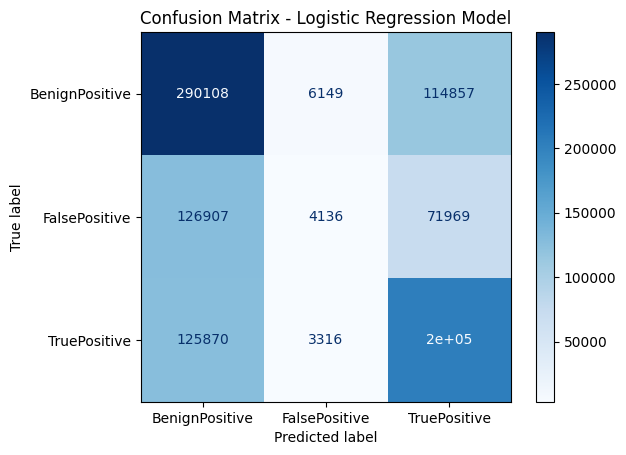

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Model
model_logistic = LogisticRegression(random_state=42)

# Print message for evaluation
print(f"\nEvaluating Logistic Regression Model...")

# Fit the logistic regression model
model_logistic.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model_logistic.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


# **RANDOM FOREST**


Evaluating RandomForest...
Accuracy: 0.7759149481949311
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80    411114
           1       0.94      0.50      0.66    203012
           2       0.97      0.69      0.81    332403

    accuracy                           0.78    946529
   macro avg       0.86      0.72      0.75    946529
weighted avg       0.84      0.78      0.77    946529



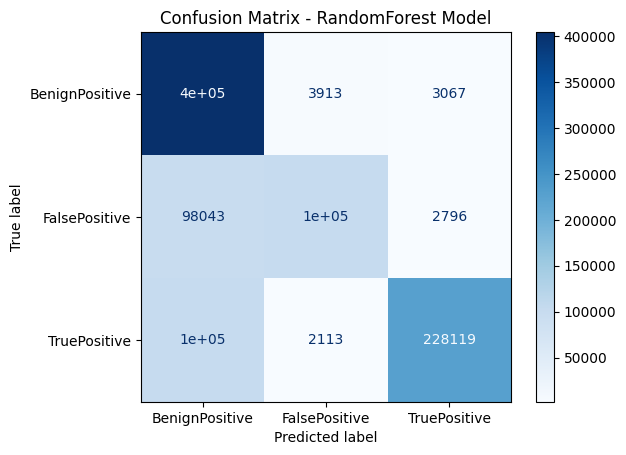

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize RandomForest with optimizations
model_rf = RandomForestClassifier(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit the depth of the trees
    max_features='sqrt',    # Use the square root of features
    n_jobs=-1,              # Enable parallel processing
    random_state=42
)

# Print message for evaluation
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest Model')
plt.show()


# **XGBoost**


Evaluating XGBoost...
Accuracy: 0.9172555727294145
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    411114
           1       0.93      0.85      0.89    203012
           2       0.94      0.91      0.93    332403

    accuracy                           0.92    946529
   macro avg       0.92      0.91      0.91    946529
weighted avg       0.92      0.92      0.92    946529



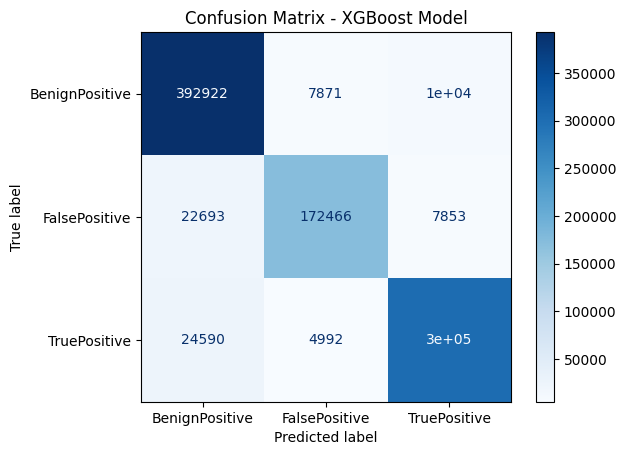

In [17]:
model_xgb = XGBClassifier(random_state=42)

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

# **LGBM**


Evaluating LGBoost...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.997837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2725
[LightGBM] [Info] Number of data points in the train set: 3786114, number of used features: 15
[LightGBM] [Info] Start training from score -0.834415
[LightGBM] [Info] Start training from score -1.538647
[LightGBM] [Info] Start training from score -1.046399
Accuracy: 0.8952139871044628
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    411114
           1       0.93      0.80      0.86    203012
           2       0.94      0.88      0.91    332403

    accuracy                           0.90    946529
   macro avg       0.91      0.88      0.89    946529
weighted avg       0.90      0.90      0.89    946529



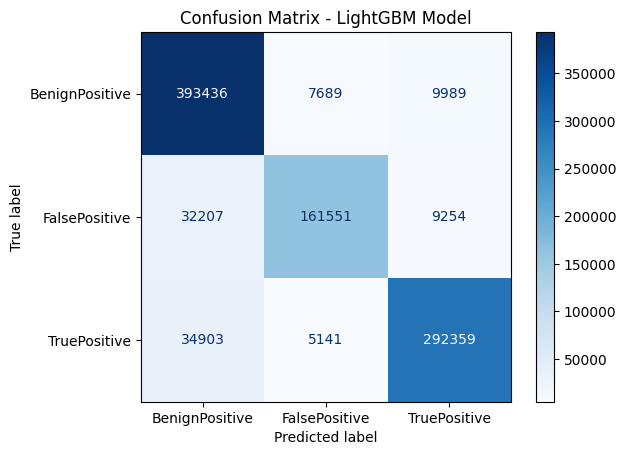

In [18]:
model_lgb = LGBMClassifier(random_state = 42)

#LGBoost
print(f"\nEvaluating LGBoost...")

# Fit the model
model_lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = model_lgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()

# **Decision Tree**


Evaluating Decision Tree...
Accuracy: 0.7740269975880295
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79    411114
           1       0.87      0.54      0.67    203012
           2       0.93      0.71      0.80    332403

    accuracy                           0.77    946529
   macro avg       0.83      0.73      0.76    946529
weighted avg       0.81      0.77      0.77    946529



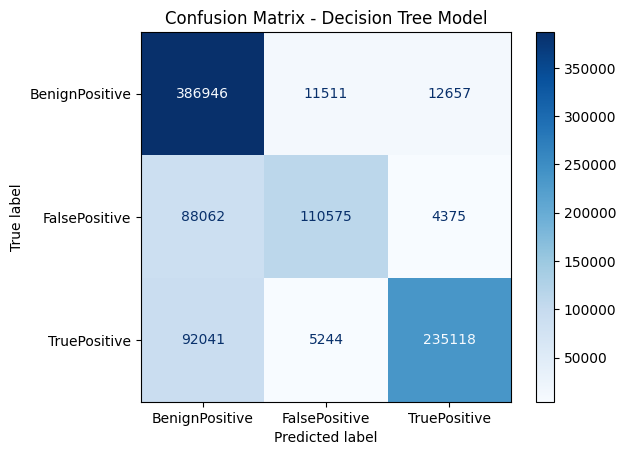

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree with optimizations
model_dt = DecisionTreeClassifier(
    max_depth=10,            # Limit the depth of the tree
    random_state=42          # For reproducibility
)

# Print message for evaluation
print(f"\nEvaluating Decision Tree...")

# Fit the Decision Tree model
model_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = model_dt.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()


# **Saving the best model**

In [20]:
import joblib

# Save the trained XGBoost model to a file
joblib.dump(model_xgb, '/content/drive/MyDrive/xgboost_model.pkl')

['/content/drive/MyDrive/xgboost_model.pkl']

# **Error Analysis for each model**

*   Logistic Regression
*   Random Forest
*   XG-Boost
*   LG-Boost
*Decision Tree





In [22]:
# Error Analysis
errors = (y_test !=y_pred_logistic)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted':y_pred_logistic[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
957731      1          0
397017      1          0
4270937     2          0
2381102     1          0
2392219     2          0
...       ...        ...
1125481     2          0
3302413     0          2
355619      2          0
447127      1          2
1606206     1          0

[449068 rows x 2 columns]


In [23]:
# Error Analysis
errors = (y_test != y_pred_rf)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_rf[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
397017      1          0
2381102     1          0
3611466     2          0
207923      1          0
4411750     1          0
...       ...        ...
395440      1          0
1125481     2          0
447127      1          0
1056690     2          0
1488391     0          2

[212103 rows x 2 columns]


In [24]:
# Error Analysis
errors = (y_test != y_pred_lgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_lgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
1924978     0          2
207923      1          0
4221619     2          0
2809096     1          0
3457670     2          0
...       ...        ...
3135410     1          0
2858259     2          0
903427      0          1
1125481     2          0
1488391     0          2

[99183 rows x 2 columns]


In [25]:
# Error Analysis
errors = (y_test != y_pred_xgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_xgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
207923      1          0
2435244     0          1
2809096     1          0
3457670     2          0
3562694     1          2
...       ...        ...
769112      2          0
3192517     0          2
1373093     2          0
3135410     1          0
1125481     2          0

[78320 rows x 2 columns]


In [26]:
# Error Analysis for Decision Tree
errors_dt = (y_test != y_pred_dt)  # Identify misclassifications
error_analysis_dt = pd.DataFrame({'True': y_test[errors_dt], 'Predicted': y_pred_dt[errors_dt]})

# Display misclassifications
print("Error Analysis (Misclassifications) - Decision Tree:")
print(error_analysis_dt)


Error Analysis (Misclassifications) - Decision Tree:
         True  Predicted
397017      1          0
2023798     0          1
2381102     1          0
3611466     2          0
207923      1          0
...       ...        ...
2577462     1          0
395440      1          0
1125481     2          0
447127      1          0
1056690     2          0

[213890 rows x 2 columns]


# **Final Evaluation on Test**

In [27]:
X2 = df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
y2= df_test['IncidentGrade']

# **Importing Trained model**

In [28]:
import joblib

# Load the model
loaded_model_rf = joblib.load('/content/drive/MyDrive/xgboost_model.pkl')

# Check the model type
print(type(loaded_model_rf))

<class 'xgboost.sklearn.XGBClassifier'>


In [29]:
y_pred_new = loaded_model_rf.predict(X2)

In [30]:
print("Accuracy:", accuracy_score(y2, y_pred_new))
print("Classification Report:")
print(classification_report(y2, y_pred_new))

Accuracy: 0.8932897898882516
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90   1752895
           1       0.88      0.81      0.85    902664
           2       0.93      0.90      0.91   1492329

    accuracy                           0.89   4147888
   macro avg       0.89      0.88      0.89   4147888
weighted avg       0.89      0.89      0.89   4147888



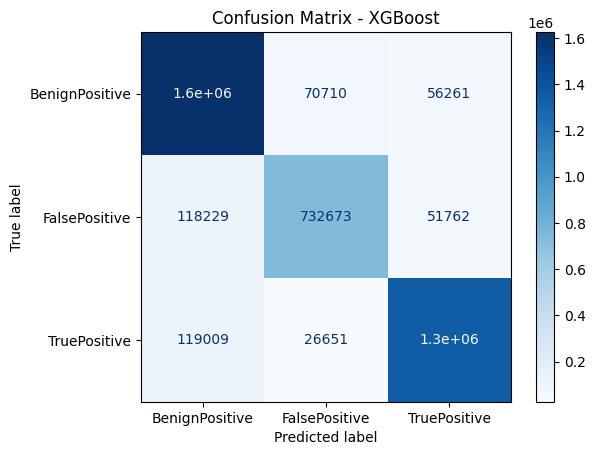

In [31]:
# Generate the confusion matrix
cm = confusion_matrix(y2, y_pred_new)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()